In [1]:
import math
import statistics
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import binomial
from scipy.stats import geom

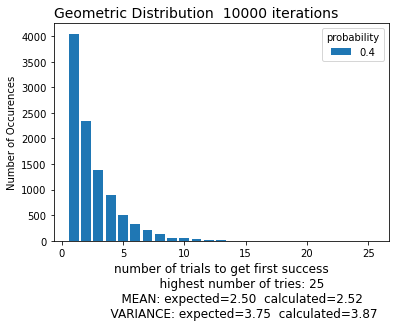

In [2]:
# example of simulating a geometric distribution process
# flip a single coin until first success

# define the parameters of the distribution
# p is probability
p = 0.4
# only one Bernoulli trial at a time
k = 1
iterations = 10000
num_tries_list = []
tries_dict = {}  #dictionary keeps track of number of tries

for i in range(iterations):
    not_success = True
    #number of trials to get a success
    num_tries = 0
    while (not_success):
        trial = binomial(k, p)
        num_tries +=1
        if (trial == 1):
            not_success = False
            num_tries_list.append(num_tries)
            tries_dict[num_tries] = tries_dict.get(num_tries, 0) + 1
            break

# statistics
#samp_mean = statistics.mean(num_tries_list)
#samp_var = np.var(num_tries_list)
# try my own math
calc_mean = sum(num_tries_list)/len(num_tries_list)
ex_mean = 1/p
sum_squares = 0.0
for nn in num_tries_list:
    sum_squares += (calc_mean - nn)**2
calc_var = sum_squares/len(num_tries_list)
ex_var = (1-p)/(p*p)

# histogram of successful values over all trials           
hdata = sorted(tries_dict.items())
number, occurences = zip(*hdata)
plt.bar(number, occurences, label=p)
plt.title('Geometric Distribution  {} iterations'.format(iterations), loc='left', fontsize=14)
plt.xlabel('number of trials to get first success\n\
            highest number of tries: {} \n\
            MEAN: expected={:.2f}  calculated={:.2f} \n\
            VARIANCE: expected={:.2f}  calculated={:.2f}'\
            .format(max(number), ex_mean, calc_mean, ex_var, calc_var), fontsize=12)
plt.ylabel("Number of Occurences")
plt.legend(title='probability')
plt.savefig('geom_trials.svg', bbox_inches='tight')
plt.show();

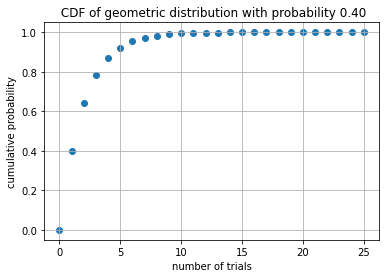

In [3]:
# CDF of geometric distribution
# parameters from above

x_plot = range(max(number) + 1)
prob = geom.cdf(x_plot, p)

plt.scatter(x_plot, prob)
plt.title(' CDF of geometric distribution with probability {:.2f}'.format(p))
plt.xlabel('number of trials')
plt.ylabel('cumulative probability')
plt.grid()
plt.savefig('geom_cdf.svg')
plt.show();


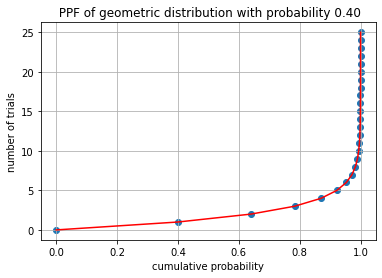

In [4]:
# PPF of geometric distribution
# inverse function of CDF

plt.scatter(prob, x_plot, marker='o')
plt.plot(prob, x_plot, color='red')
plt.title(' PPF of geometric distribution with probability {:.2f}'.format(p))
plt.ylabel('number of trials')
plt.xlabel('cumulative probability')
plt.grid()
plt.savefig('geom_ppf.svg')
plt.show();